In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from sklearn import mixture

## 1. Load Data

In [2]:
from sklearn import datasets


In [4]:
data = datasets.load_iris()

In [10]:
len(data['data'])

150

In [12]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

## 2. Train test split

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,test_size=0.3)


In [15]:
X_train.shape

(105, 4)

In [16]:
X_test.shape

(45, 4)

In [17]:
y_train

array([2, 0, 2, 2, 0, 2, 1, 1, 0, 1, 1, 0, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0,
       0, 2, 1, 0, 0, 2, 1, 0, 0, 1, 2, 0, 2, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       0, 0, 0, 2, 1, 2, 2, 1, 0, 0, 0, 2, 2, 2, 0, 1, 0, 1, 0, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 1, 0, 0, 1, 2, 1, 1, 0, 0, 0, 2, 2, 1, 0, 1, 1,
       1, 2, 2, 1, 0, 0, 0, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0])

## 3. Train GMM model

In [18]:
from sklearn.mixture import GaussianMixture

In [20]:
model =  GaussianMixture(n_components=3, max_iter=200, random_state=0)

In [21]:
model.fit(X_train)

C:\Users\DEMO_ACCOUNT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


GaussianMixture(max_iter=200, n_components=3, random_state=0)

## Let's do some visualization

In [27]:
import matplotlib as mpl

colors = ["navy", "turquoise", "darkorange"]

In [22]:
def make_ (gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        v, w = np.linalg.eigh(covariances)
        u = w[0] / np.linalg.norm(w[0])
        angle = np.arctan2(u[1], u[0])
        angle = 180 * angle / np.pi  # convert to degrees
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        ell = mpl.patches.Ellipse(
            gmm.means_[n, :2], v[0], v[1], angle=180 + angle, color=color
        )
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect("equal", "datalim")

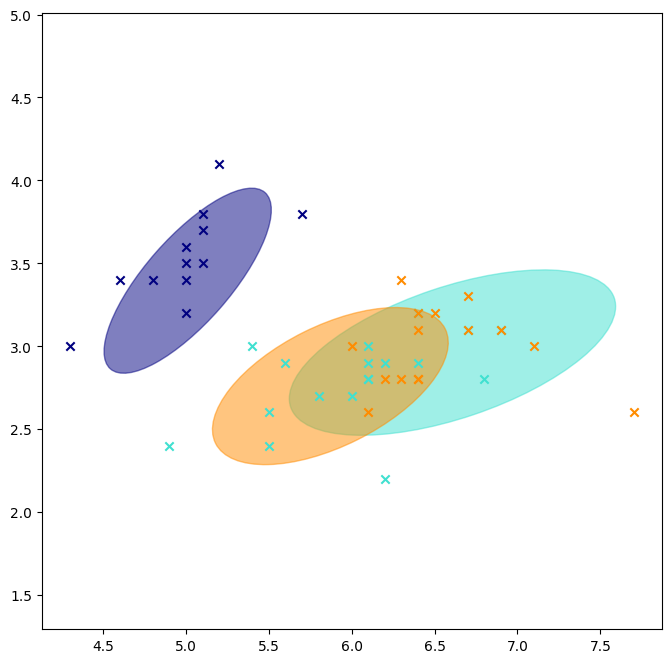

In [28]:
plt.figure(figsize=(8,8))
ax = plt.gca()
make_ellipses(model, ax)
for n, color in enumerate(colors):
    data = X_test[y_test == n]
    plt.scatter(data[:, 0], data[:, 1], marker="x", color=color)